## Problem Statement - 
Implement two neural networks (with 3 layers and 5 layers) regression to predict housing prices and discuss accuracy of one over other.

__NOTE__ : There are some tableau visualizations in the code. So hover over the viz to get more insights of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train.csv')   # loading the train data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('test.csv')  # loading the test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("Train Shape: ", df_train.shape)
df_train.describe()

Train Shape:  (1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print("Test shape: ",df_test.shape)
df_test.describe()

Test shape:  (1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


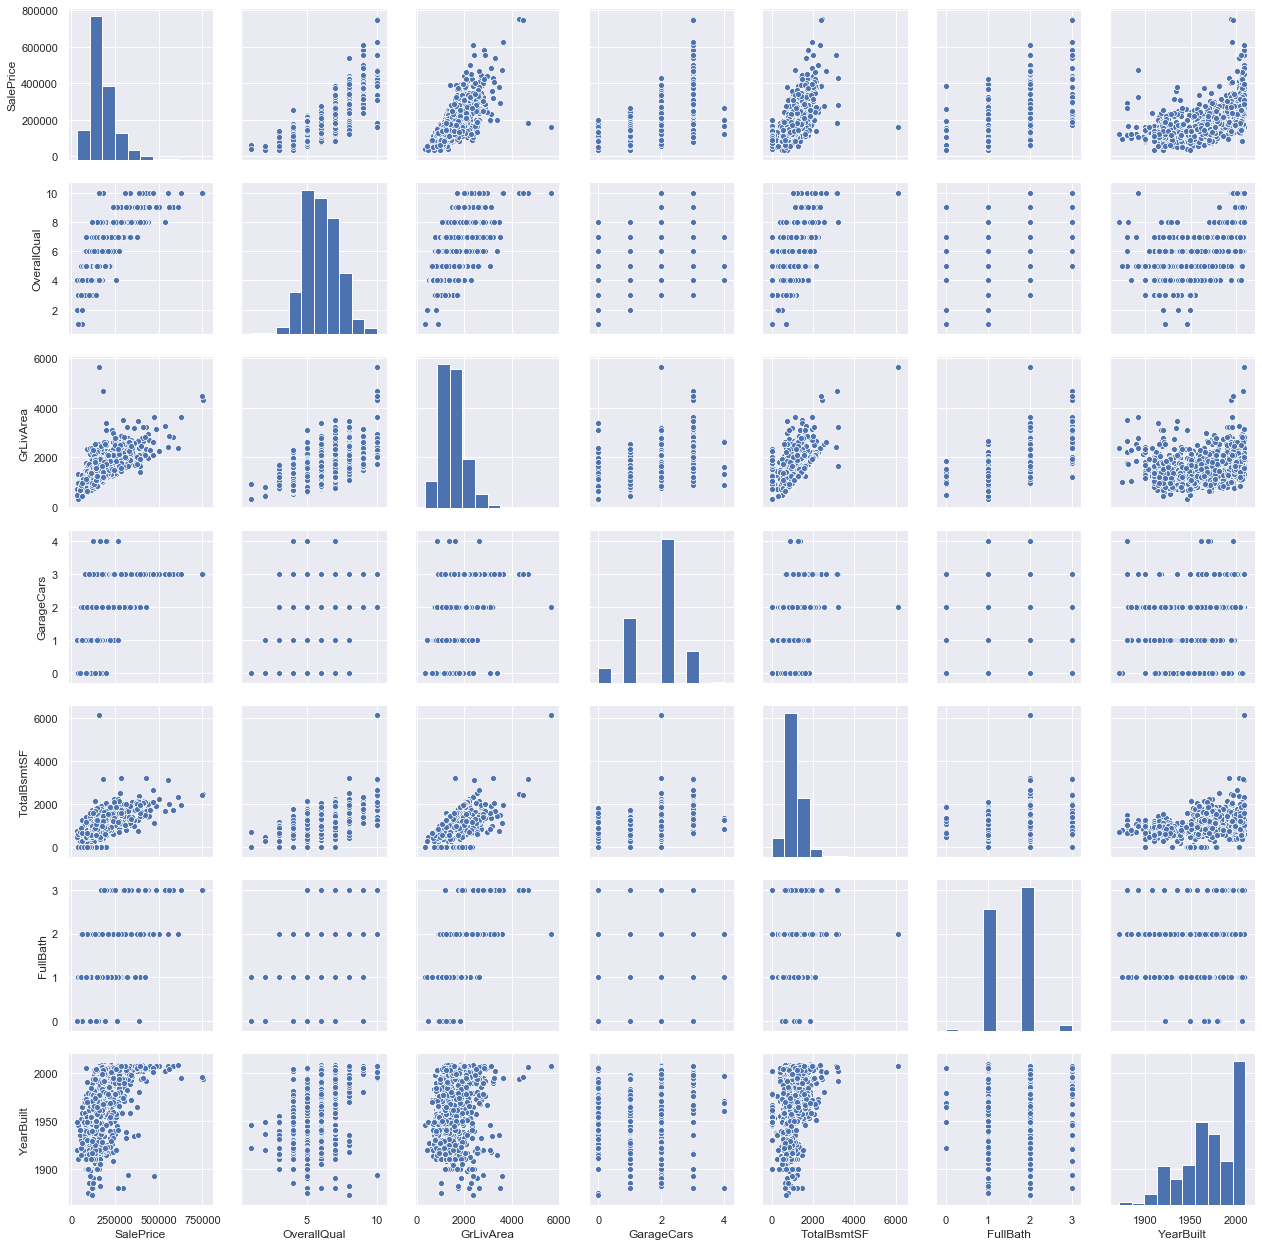

In [6]:
import seaborn as sns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# TREATING OUTLIERS

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1564577759762' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564577759762');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1564577982635' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet7&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet7' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet7&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564577982635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations:__ 
1. As the GrLiveArea increases the saleprice also increases
2. As the TotalBsmtSF increases the saleprice increases.
3. But there are two points in the dataset with Id = 1299 and 524 which do not follow this trend

In [9]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [10]:
train_ID = df_train['Id']
test_ID = df_test['Id']

#delete the id column from datasets
del df_train['Id']
del df_test['Id']

In [11]:
print(df_train.shape)
print(df_test.shape)

(1458, 80)
(1459, 79)


Text(0.5, 1.0, 'Houses Sold per Year')

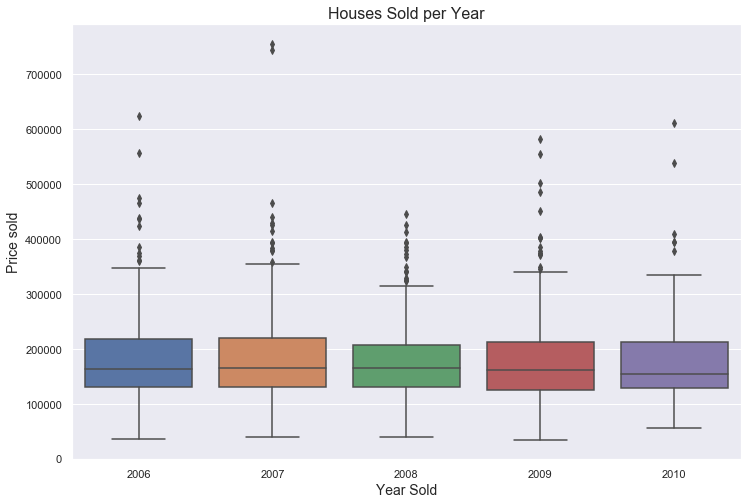

In [12]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=df_train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

__Observations__: 
The sale price of the most of the houses sold each year is in between 12,000 to 21,000.

# DATA NORMALIZATION


 mu = 180932.92 and sigma = 79467.79



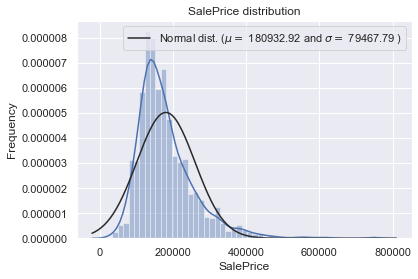

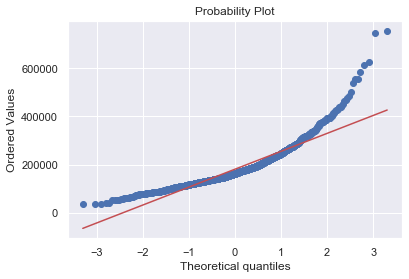

In [13]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df_train['SalePrice'] , fit=norm);


(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



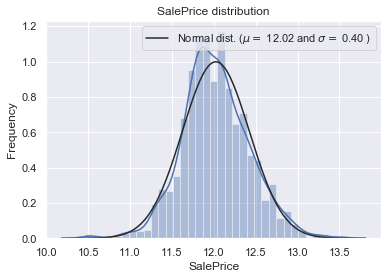

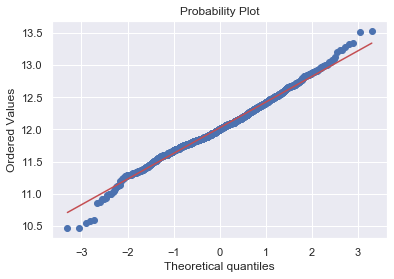

In [14]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df_train['SalePrice'] , fit=norm);


(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [15]:
%%HTML
<div class='tableauPlaceholder' id='viz1564580491758' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564580491758');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations__:
1. The number of houses built in 2006 was highest with total of 67 houses built that year.
2. In the years 1920,1976,2002,2003,2007,2008 significant number of houses were built.

In [16]:
%%HTML
<div class='tableauPlaceholder' id='viz1564581355727' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='houseprices_15645778197910&#47;Sheet9' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ho&#47;houseprices_15645778197910&#47;Sheet9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1564581355727');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__Observations__:
Most number of houses were built in the neighborhood 'NAmes' and the least number of houses were built in the 'Blueste' neighborhood.

In [17]:
y = df_train['SalePrice'].values
df_train.drop(['SalePrice'], axis=1, inplace=True)
print("df_train size is : {}".format(df_train.shape))

df_train size is : (1458, 79)


In [18]:
df = pd.concat((df_train, df_test)).reset_index(drop=True)
print("Shape of new dataframe: ",df.shape)
df.head()

Shape of new dataframe:  (2917, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


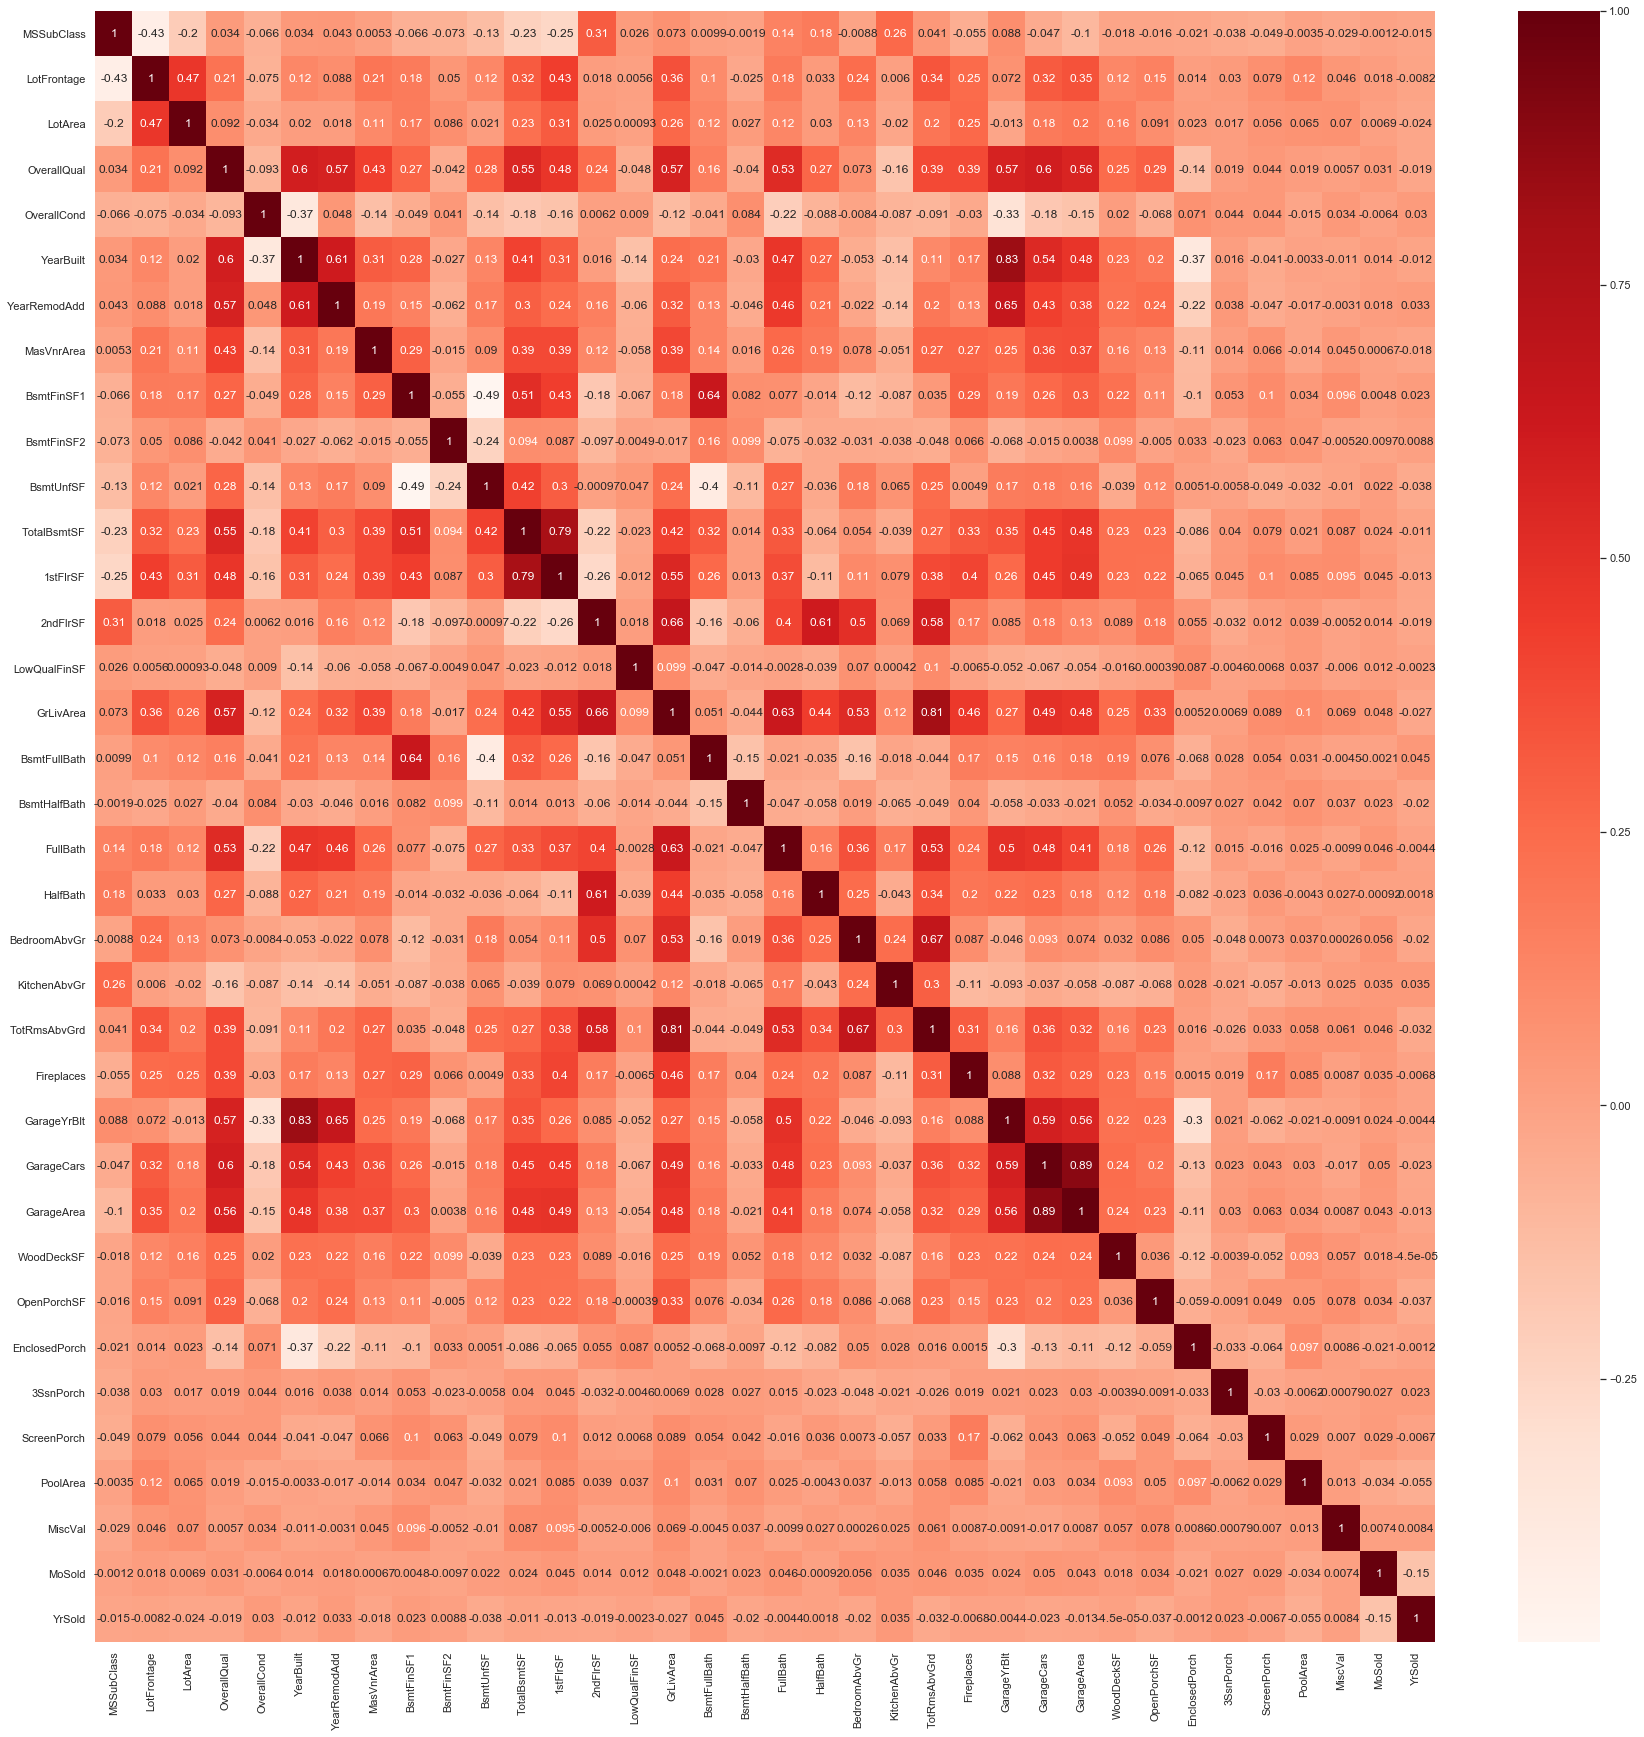

In [19]:
# correlation matrix

plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

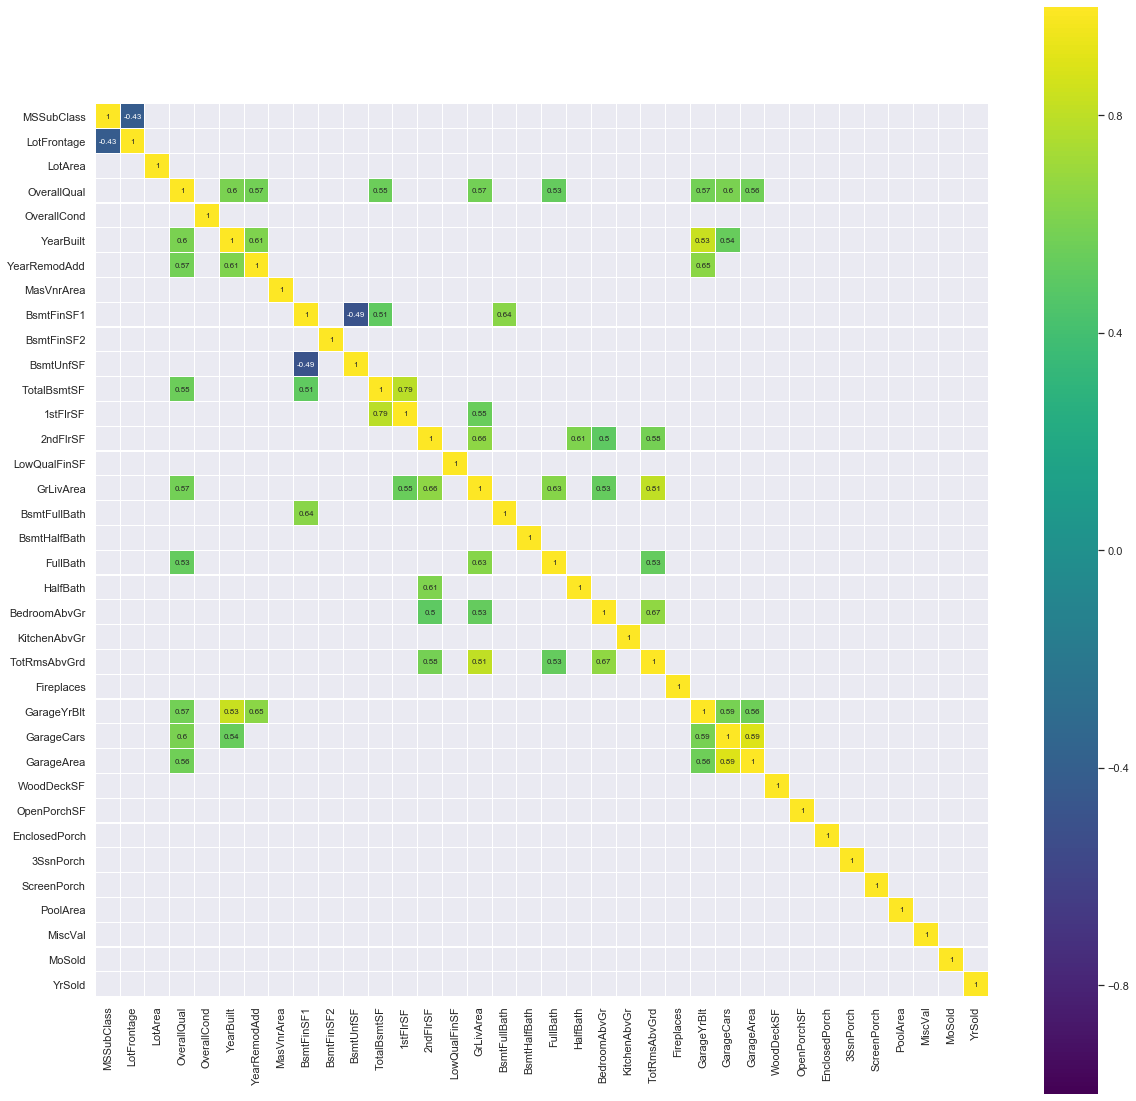

In [20]:
# Most corelated features

import seaborn as sns

corr = df.corr() 
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

The correlation coefficient has values between -1 to 1
1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies stronger negative correlation

# Dealing with missing values

Populating the interactive namespace from numpy and matplotlib


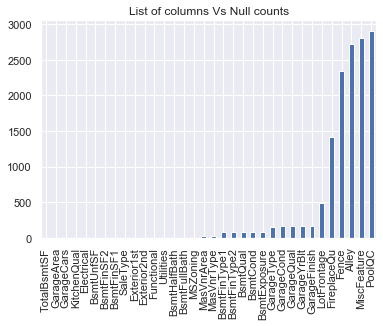

In [21]:
%pylab inline
null_columns = df.isnull().sum()  # to find the number of null values in each column
null_columns = null_columns[null_columns.values > 0]
null_columns.sort_values(inplace=True)
plt.title('List of columns Vs Null counts')
null_columns.plot.bar()

In [22]:
limitPer = 0.4*(len(df))
df = df.dropna(thresh=limitPer,axis=1)   #dropping alll those columns which have more than 40% null values in them
print(df.shape)
df.columns

(2917, 75)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [23]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageCond,5.450806
GarageType,5.382242
BsmtExposure,2.811107
BsmtCond,2.811107
BsmtQual,2.776826


In [24]:
df.drop(columns={'FireplaceQu'}, inplace=True)

In [25]:
df['LotFrontage'] = df.fillna(df['LotFrontage'].median())   # replacing nan values with median of the column

In [26]:
#replacing null values with 'None' as there may be no garage in the house
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [27]:
df['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

The most occuring value in MSZoning is RL, so we replace all the null values by RL

In [28]:
# imputiong with the most occuring value ( mode )

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

#as there is only one missing value, we will impute it with the most occurring value
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])


df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [29]:
#NaN means there is no basement, so filling the null values with 'None'
for col in('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    df[col]=df.fillna('None')

In [30]:
for col in ('BsmtFinSF1','TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtUnfSF'):   # some houses have no basements so filling it with 0
    df[col] = df[col].fillna(0)

In [31]:
#no masonry veneer for some houses
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [32]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)  # There is no garage in some houses so replacing it with 0

In [33]:
df = df.drop(['Utilities'], axis=1)  # This column have mostly same value so droping this Utilities column

In [34]:
#NA for 'Functional' variable means typical (as per data description)
df["Functional"] = df["Functional"].fillna("Typ")

In [35]:
for col in ('GarageArea', 'GarageCars'):   # there is no garage so filling missing values by 0
    df[col] = df[col].fillna(0)

In [36]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio


No more missing values are there in the dataset, so now we can proceed further.

In [37]:
df['Street'].value_counts()

Pave    2905
Grvl      12
Name: Street, dtype: int64

In [38]:
df.drop(columns={'Street'}, inplace=True) # We can drop the columns Street because almost all the values are same

In [39]:
print('Shape of df : ',df.shape)

Shape of df :  (2917, 72)


In [40]:
# Finding the number of categorical columns and numerical columns in the data set

cat_col = []
num_col = []

cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(exclude=['object'])

for col in cat.columns:
    cat_col.append(col)
    
for col in num.columns:
    num_col.append(col)

In [41]:
print('No. of categorical columns: ', len(cat_col))
print('No. of numerical columns: ', len(num_col))

No. of categorical columns:  37
No. of numerical columns:  35


In [42]:
df = df[num_col + cat_col]

In [43]:
from sklearn.preprocessing import LabelEncoder

def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

    
print('There were {} columns before encoding categorical features'.format(df.shape[1]))
df = oneHotEncode(df, cat_col)
print('There are {} columns after encoding categorical features'.format(df.shape[1]))

There were 72 columns before encoding categorical features
There are 340 columns after encoding categorical features


In [44]:
train = df[:1458]
test = df[1458:]

In [45]:
print(train.shape)
print(y.shape)
print(test.shape)

(1458, 340)
(1458,)
(1459, 340)


# Neural Network with 5 layers

In [46]:
from keras import metrics
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

Using TensorFlow backend.


In [47]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import layers

def build_regressor():
    
    model = Sequential()    

    # input lauer
    model.add(Dense(256, kernel_initializer='normal', input_dim=train.shape[1], activation='relu'))
    
    # hiddden layers
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    
    # output layer
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    model.compile(
        loss = 'mean_squared_error',
        optimizer = 'adam',
        metrics = ['mean_squared_error'])

    model.summary()
    
    return model

In [48]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=build_regressor, batch_size=34, epochs=600)

In [49]:
model.fit(x_train, y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               87296     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 132,673
Trainable params: 132,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
976/976 [==============================] - 0s 319us/step - loss: 373.0279 - mean_squared_error: 373.0279
Epoch 2/600
976/976

976/976 [==============================] - 0s 59us/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 65/600
976/976 [==============================] - 0s 59us/step - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 66/600
976/976 [==============================] - 0s 55us/step - loss: 0.0681 - mean_squared_error: 0.0681
Epoch 67/600
976/976 [==============================] - 0s 53us/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 68/600
976/976 [==============================] - 0s 57us/step - loss: 0.1801 - mean_squared_error: 0.1801
Epoch 69/600
976/976 [==============================] - 0s 60us/step - loss: 0.1519 - mean_squared_error: 0.1519
Epoch 70/600
976/976 [==============================] - 0s 58us/step - loss: 0.1597 - mean_squared_error: 0.1597
Epoch 71/600
976/976 [==============================] - 0s 53us/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 72/600
976/976 [==============================] - 0s 54us/step - loss: 0.0763 - mean_squared_error: 0.0

976/976 [==============================] - 0s 55us/step - loss: 2.1558 - mean_squared_error: 2.1558
Epoch 137/600
976/976 [==============================] - 0s 58us/step - loss: 0.9221 - mean_squared_error: 0.9221
Epoch 138/600
976/976 [==============================] - 0s 54us/step - loss: 0.7412 - mean_squared_error: 0.7412
Epoch 139/600
976/976 [==============================] - 0s 55us/step - loss: 1.4701 - mean_squared_error: 1.4701
Epoch 140/600
976/976 [==============================] - 0s 55us/step - loss: 0.2586 - mean_squared_error: 0.2586
Epoch 141/600
976/976 [==============================] - 0s 54us/step - loss: 0.2055 - mean_squared_error: 0.2055
Epoch 142/600
976/976 [==============================] - 0s 53us/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 143/600
976/976 [==============================] - 0s 57us/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 144/600
976/976 [==============================] - 0s 54us/step - loss: 0.0651 - mean_squared_er

Epoch 208/600
976/976 [==============================] - 0s 60us/step - loss: 6.8054 - mean_squared_error: 6.8054
Epoch 209/600
976/976 [==============================] - 0s 59us/step - loss: 1.0051 - mean_squared_error: 1.0051
Epoch 210/600
976/976 [==============================] - 0s 53us/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 211/600
976/976 [==============================] - 0s 52us/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 212/600
976/976 [==============================] - 0s 59us/step - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 213/600
976/976 [==============================] - 0s 74us/step - loss: 0.1944 - mean_squared_error: 0.1944
Epoch 214/600
976/976 [==============================] - 0s 66us/step - loss: 0.0883 - mean_squared_error: 0.0883
Epoch 215/600
976/976 [==============================] - 0s 54us/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 216/600
976/976 [==============================] - 0s 59us/step - loss: 0.0889 - m

976/976 [==============================] - 0s 54us/step - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 280/600
976/976 [==============================] - 0s 57us/step - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 281/600
976/976 [==============================] - 0s 59us/step - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 282/600
976/976 [==============================] - 0s 53us/step - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 283/600
976/976 [==============================] - 0s 53us/step - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 284/600
976/976 [==============================] - 0s 56us/step - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 285/600
976/976 [==============================] - 0s 57us/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 286/600
976/976 [==============================] - 0s 54us/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 287/600
976/976 [==============================] - 0s 53us/step - loss: 0.0207 - mean_squared_er

Epoch 351/600
976/976 [==============================] - 0s 58us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 352/600
976/976 [==============================] - 0s 54us/step - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 353/600
976/976 [==============================] - 0s 53us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 354/600
976/976 [==============================] - 0s 58us/step - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 355/600
976/976 [==============================] - 0s 55us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 356/600
976/976 [==============================] - 0s 52us/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 357/600
976/976 [==============================] - 0s 53us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 358/600
976/976 [==============================] - 0s 54us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 359/600
976/976 [==============================] - 0s 54us/step - loss: 0.0162 - m

976/976 [==============================] - 0s 58us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 423/600
976/976 [==============================] - 0s 55us/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 424/600
976/976 [==============================] - 0s 59us/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 425/600
976/976 [==============================] - 0s 58us/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 426/600
976/976 [==============================] - 0s 54us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 427/600
976/976 [==============================] - 0s 53us/step - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 428/600
976/976 [==============================] - 0s 56us/step - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 429/600
976/976 [==============================] - 0s 54us/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 430/600
976/976 [==============================] - 0s 52us/step - loss: 0.0207 - mean_squared_er

Epoch 494/600
976/976 [==============================] - 0s 60us/step - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 495/600
976/976 [==============================] - 0s 53us/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 496/600
976/976 [==============================] - 0s 53us/step - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 497/600
976/976 [==============================] - 0s 55us/step - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 498/600
976/976 [==============================] - 0s 58us/step - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 499/600
976/976 [==============================] - 0s 53us/step - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 500/600
976/976 [==============================] - 0s 57us/step - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 501/600
976/976 [==============================] - 0s 53us/step - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 502/600
976/976 [==============================] - 0s 58us/step - loss: 0.0146 - m

976/976 [==============================] - 0s 54us/step - loss: 0.4939 - mean_squared_error: 0.4939
Epoch 566/600
976/976 [==============================] - 0s 55us/step - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 567/600
976/976 [==============================] - 0s 58us/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 568/600
976/976 [==============================] - 0s 55us/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 569/600
976/976 [==============================] - 0s 53us/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 570/600
976/976 [==============================] - 0s 54us/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 571/600
976/976 [==============================] - 0s 55us/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 572/600
976/976 [==============================] - 0s 57us/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 573/600
976/976 [==============================] - 0s 52us/step - loss: 0.0161 - mean_squared_er

In [50]:
pred = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
print('Mean Squared error: ',mse)

Mean Squared error:  0.023794269979765716


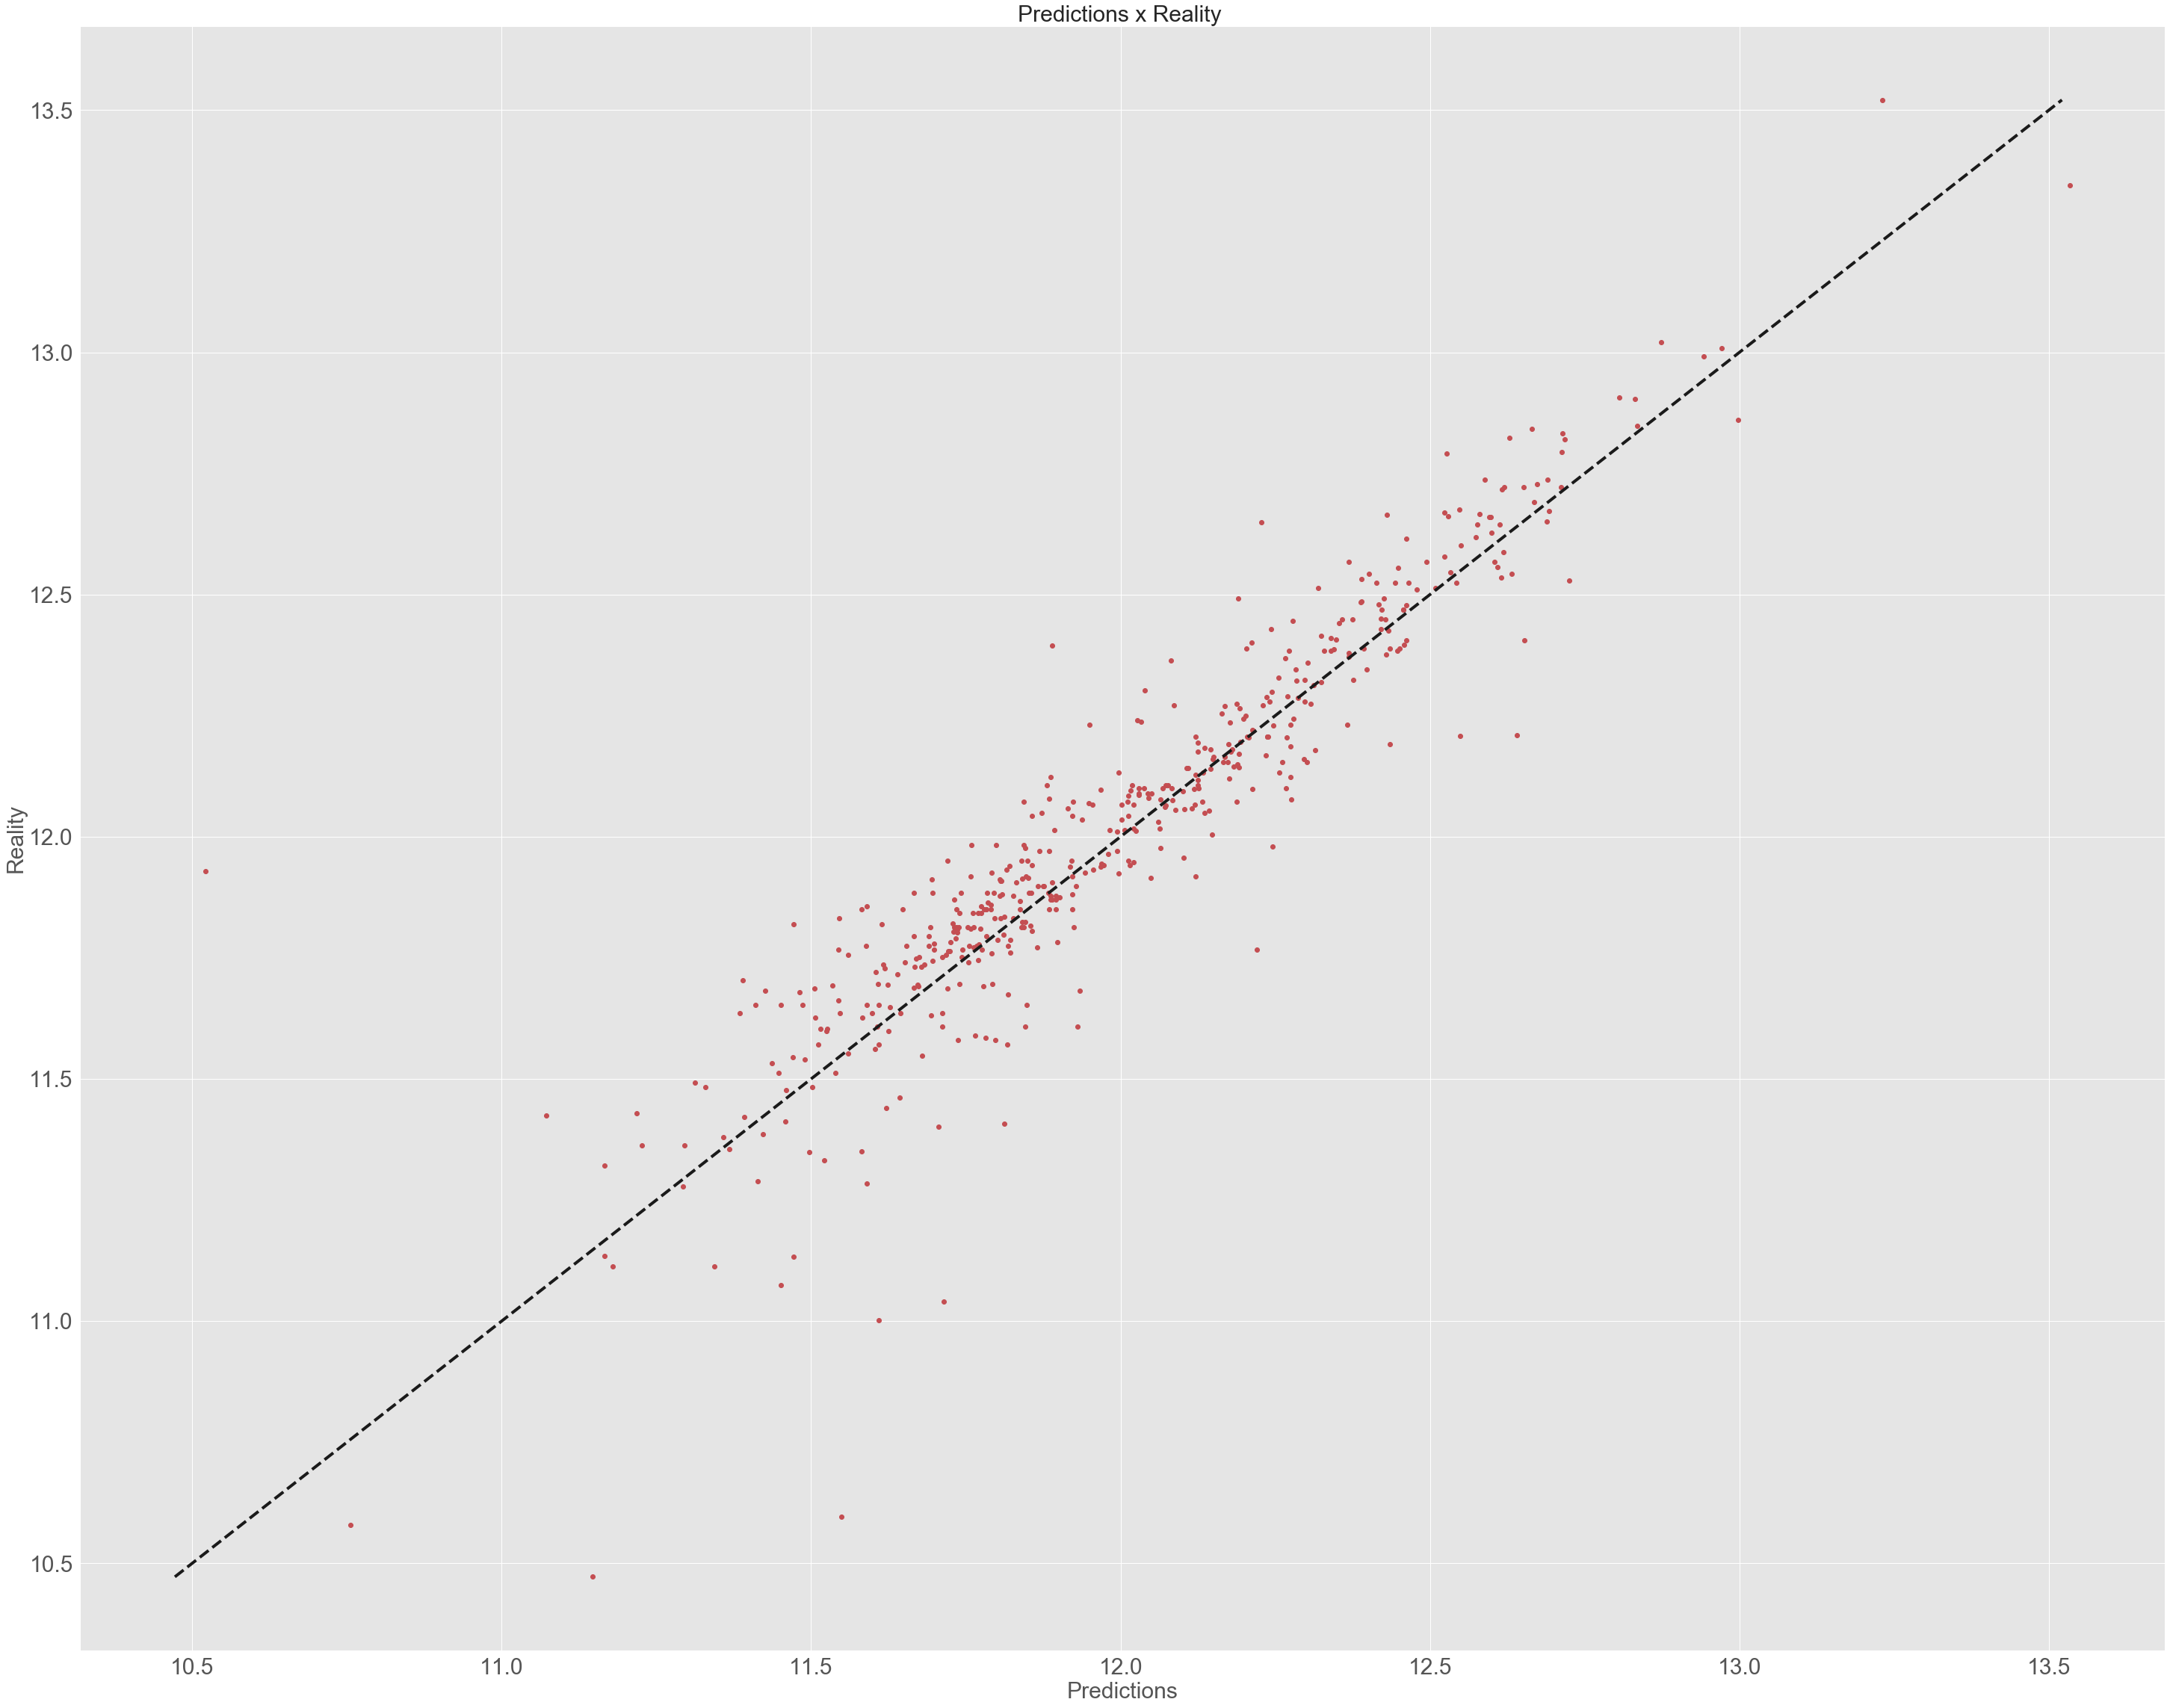

In [63]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(pred, y_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality ', fontsize = 30)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


# Neural Network with 3 layers

In [53]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(train, y, test_size=0.33, random_state=42)

In [54]:
def build_regressor():
    
    model = Sequential()

    # input layer
    model.add(Dense(200, kernel_initializer='normal', input_dim=x_train_n.shape[1], activation='relu'))
    
    # hidden layer
    model.add(Dense(86, kernel_initializer='normal', activation='relu'))
    
    # output layer
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    model.compile(
        loss = 'mean_squared_error',
        optimizer = 'adam',
        metrics = ['mean_squared_error'])

    model.summary()
    
    return model

In [55]:
model = KerasRegressor(build_fn=build_regressor, batch_size=34, epochs=600)

In [56]:
model.fit(x_train_n, y_train_n)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               68200     
_________________________________________________________________
dense_7 (Dense)              (None, 86)                17286     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 87        
Total params: 85,573
Trainable params: 85,573
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
976/976 [==============================] - 0s 229us/step - loss: 9647.6196 - mean_squared_error: 9647.6196
Epoch 2/600
976/976 [==============================] - 0s 52us/step - loss: 851.7553 - mean_squared_error: 851.7553
Epoch 3/600
976/976 [==============================] - 0s 47us/step - loss: 145.4153 - mean_squared_error: 145.4153
Epoch 4/600
976/976 [==============================

976/976 [==============================] - 0s 57us/step - loss: 1.5719 - mean_squared_error: 1.5719
Epoch 67/600
976/976 [==============================] - 0s 47us/step - loss: 13.7771 - mean_squared_error: 13.7771
Epoch 68/600
976/976 [==============================] - 0s 45us/step - loss: 18.5314 - mean_squared_error: 18.5314
Epoch 69/600
976/976 [==============================] - 0s 45us/step - loss: 4.2934 - mean_squared_error: 4.2934
Epoch 70/600
976/976 [==============================] - 0s 47us/step - loss: 31.1349 - mean_squared_error: 31.1349
Epoch 71/600
976/976 [==============================] - 0s 52us/step - loss: 24.4637 - mean_squared_error: 24.4637
Epoch 72/600
976/976 [==============================] - 0s 49us/step - loss: 31.5854 - mean_squared_error: 31.5854
Epoch 73/600
976/976 [==============================] - 0s 49us/step - loss: 108.4611 - mean_squared_error: 108.4611
Epoch 74/600
976/976 [==============================] - 0s 49us/step - loss: 448.2602 - mean_sq

976/976 [==============================] - 0s 49us/step - loss: 0.2896 - mean_squared_error: 0.2896
Epoch 138/600
976/976 [==============================] - 0s 49us/step - loss: 0.2523 - mean_squared_error: 0.2523
Epoch 139/600
976/976 [==============================] - 0s 50us/step - loss: 0.1747 - mean_squared_error: 0.1747
Epoch 140/600
976/976 [==============================] - 0s 48us/step - loss: 0.7160 - mean_squared_error: 0.7160
Epoch 141/600
976/976 [==============================] - 0s 53us/step - loss: 1.3624 - mean_squared_error: 1.3624
Epoch 142/600
976/976 [==============================] - 0s 50us/step - loss: 0.1666 - mean_squared_error: 0.1666
Epoch 143/600
976/976 [==============================] - 0s 51us/step - loss: 0.1588 - mean_squared_error: 0.1588
Epoch 144/600
976/976 [==============================] - 0s 48us/step - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 145/600
976/976 [==============================] - 0s 49us/step - loss: 0.5409 - mean_squared_er

976/976 [==============================] - 0s 50us/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 209/600
976/976 [==============================] - 0s 46us/step - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 210/600
976/976 [==============================] - 0s 47us/step - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 211/600
976/976 [==============================] - 0s 45us/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 212/600
976/976 [==============================] - 0s 45us/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 213/600
976/976 [==============================] - 0s 46us/step - loss: 0.0958 - mean_squared_error: 0.0958
Epoch 214/600
976/976 [==============================] - 0s 45us/step - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 215/600
976/976 [==============================] - 0s 49us/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 216/600
976/976 [==============================] - 0s 46us/step - loss: 0.0565 - mean_squared_er

Epoch 280/600
976/976 [==============================] - 0s 49us/step - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 281/600
976/976 [==============================] - 0s 45us/step - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 282/600
976/976 [==============================] - 0s 46us/step - loss: 0.1745 - mean_squared_error: 0.1745
Epoch 283/600
976/976 [==============================] - 0s 46us/step - loss: 0.1711 - mean_squared_error: 0.1711
Epoch 284/600
976/976 [==============================] - 0s 45us/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 285/600
976/976 [==============================] - 0s 48us/step - loss: 1.3170 - mean_squared_error: 1.3170
Epoch 286/600
976/976 [==============================] - 0s 45us/step - loss: 15.8791 - mean_squared_error: 15.8791
Epoch 287/600
976/976 [==============================] - 0s 49us/step - loss: 8.6012 - mean_squared_error: 8.6012
Epoch 288/600
976/976 [==============================] - 0s 43us/step - loss: 2.3277 -

976/976 [==============================] - 0s 45us/step - loss: 0.7677 - mean_squared_error: 0.7677
Epoch 352/600
976/976 [==============================] - 0s 46us/step - loss: 0.3992 - mean_squared_error: 0.3992
Epoch 353/600
976/976 [==============================] - 0s 44us/step - loss: 1.4942 - mean_squared_error: 1.4942
Epoch 354/600
976/976 [==============================] - 0s 46us/step - loss: 1.5695 - mean_squared_error: 1.5695
Epoch 355/600
976/976 [==============================] - 0s 45us/step - loss: 0.1440 - mean_squared_error: 0.1440
Epoch 356/600
976/976 [==============================] - 0s 45us/step - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 357/600
976/976 [==============================] - 0s 48us/step - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 358/600
976/976 [==============================] - 0s 43us/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 359/600
976/976 [==============================] - 0s 47us/step - loss: 0.0291 - mean_squared_er

Epoch 423/600
976/976 [==============================] - 0s 48us/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 424/600
976/976 [==============================] - 0s 44us/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 425/600
976/976 [==============================] - 0s 43us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 426/600
976/976 [==============================] - 0s 46us/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 427/600
976/976 [==============================] - 0s 43us/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 428/600
976/976 [==============================] - 0s 47us/step - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 429/600
976/976 [==============================] - 0s 43us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 430/600
976/976 [==============================] - 0s 45us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 431/600
976/976 [==============================] - 0s 45us/step - loss: 0.0168 - m

976/976 [==============================] - 0s 49us/step - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 495/600
976/976 [==============================] - 0s 46us/step - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 496/600
976/976 [==============================] - 0s 46us/step - loss: 0.1199 - mean_squared_error: 0.1199
Epoch 497/600
976/976 [==============================] - 0s 46us/step - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 498/600
976/976 [==============================] - 0s 46us/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 499/600
976/976 [==============================] - 0s 45us/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 500/600
976/976 [==============================] - 0s 46us/step - loss: 0.2532 - mean_squared_error: 0.2532
Epoch 501/600
976/976 [==============================] - 0s 45us/step - loss: 0.4032 - mean_squared_error: 0.4032
Epoch 502/600
976/976 [==============================] - 0s 49us/step - loss: 0.3378 - mean_squared_er

976/976 [==============================] - 0s 48us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 566/600
976/976 [==============================] - 0s 50us/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 567/600
976/976 [==============================] - 0s 48us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 568/600
976/976 [==============================] - 0s 52us/step - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 569/600
976/976 [==============================] - 0s 49us/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 570/600
976/976 [==============================] - 0s 50us/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 571/600
976/976 [==============================] - 0s 48us/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 572/600
976/976 [==============================] - 0s 50us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 573/600
976/976 [==============================] - 0s 50us/step - loss: 0.0198 - mean_squared_er

In [57]:
pred_n = model.predict(x_test_n)

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_n,pred_n)
print('Mean squared error: ',mse)

Mean squared error:  0.15401569232423354


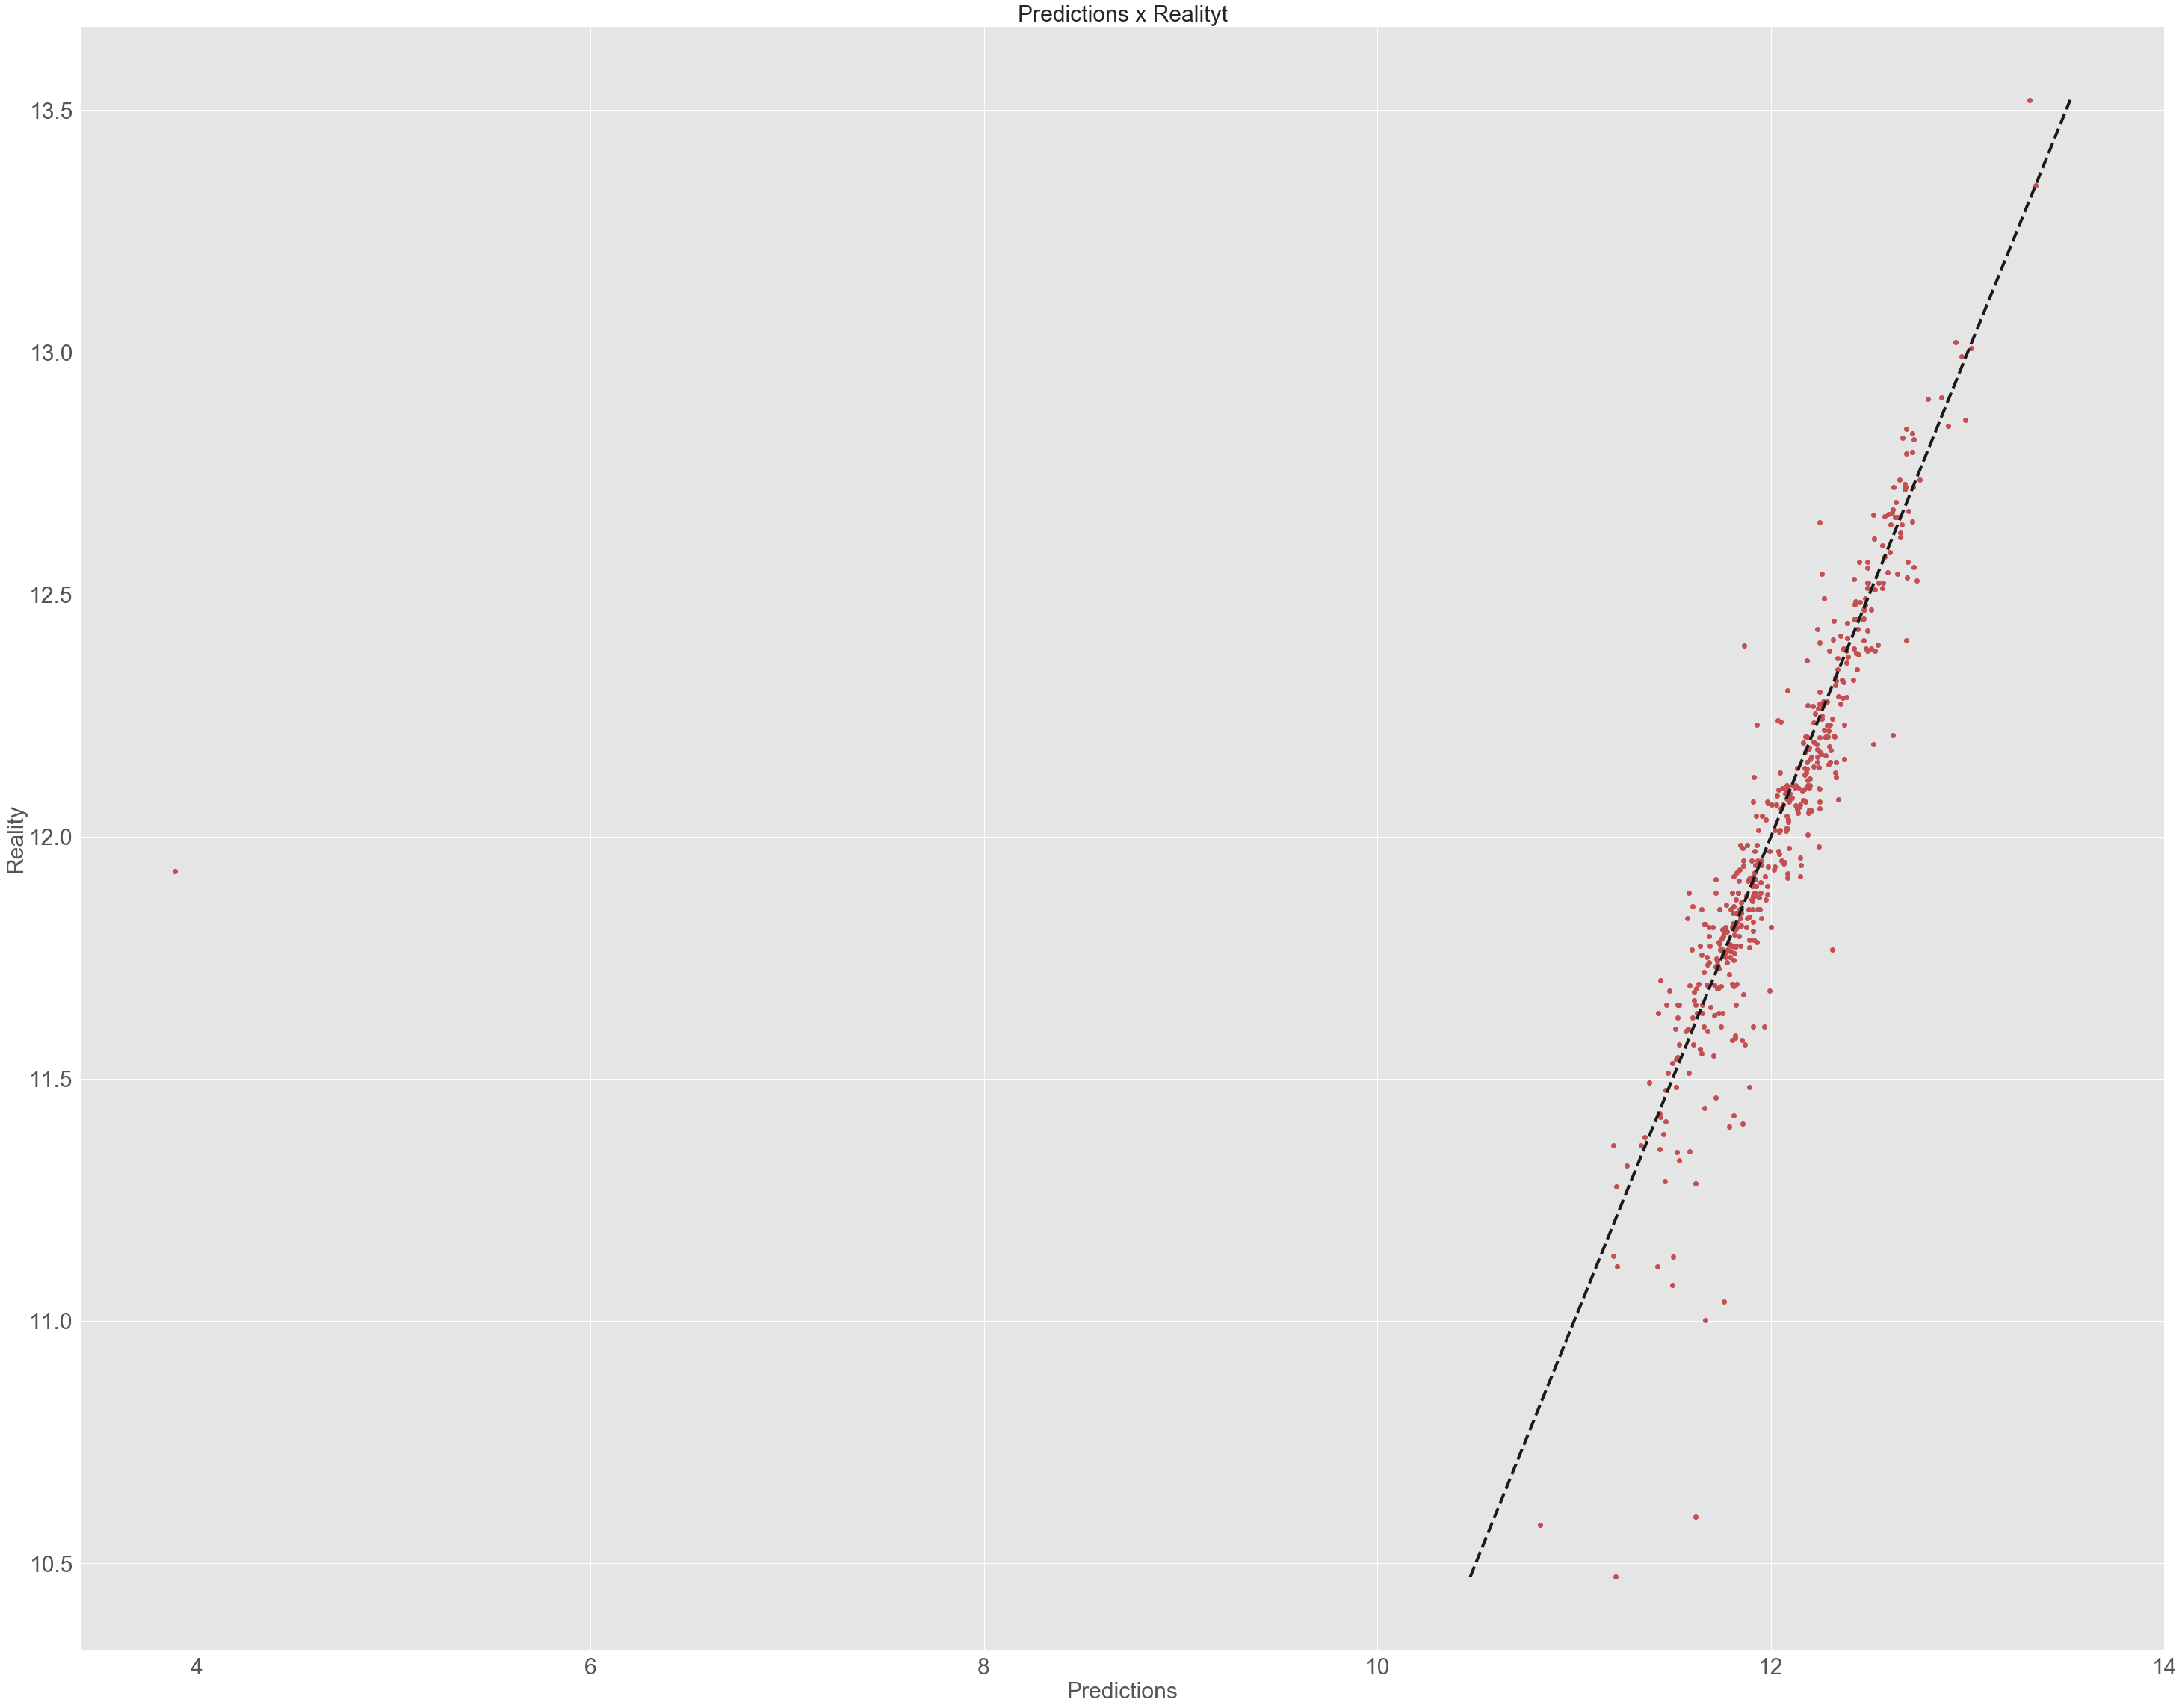

In [64]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(pred_n, y_test_n, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Realityt', fontsize = 30)
ax.plot([y_test_n.min(), y_test_n.max()], [y_test_n.min(), y_test_n.max()], 'k--', lw=4)
plt.show()


__Conclusions__ :
1. 5 layer NN :      MSE is 0.02379
2. 3 layer NN :      MSE is 0.15401

A neural network with 5 layers perform better than a 3 layer neural neywork